In [37]:
import pandas as pd
import numpy as np

In [15]:
A = [1,2,3,4,5,6] 
B = [13, 21, 34]
A_B = A.extend(B)
print(A_B)

None


In [40]:
array=np.identity(3)
print('3x3 matrix:')
print(array)

3x3 matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


#### Q 3 - Which of the following fuel type code has the lowest average fuel cost per unit burned? 
#### The Answer is - Gas
#### find code below

In [20]:
#fuel_data = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv')
fuel_data = pd.read_csv('data/fuel_ferc1.csv')
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [21]:
# the average amount of fuel_cost_per_unit_burned by fuel type
fuel_type_cat = fuel_data.groupby('fuel_type_code_pudl')
round(fuel_type_cat[['fuel_cost_per_unit_burned']].mean(), 2)

,fuel_cost_per_unit_burned
fuel_type_code_pudl,
coal,67.42
gas,13.66
nuclear,4955.16
oil,168.88
other,18.25
waste,19.52


#### Q 4 - What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?

#### The Answer - 10.6 and 17.01

In [22]:
round(fuel_data.describe(include='all'), 2) 

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.00,29523.00,29523,29523,29343,2.952300e+04,29523.00,29523.00,29523.00,29523.00
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2007_12_74_0_8,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.60,2005.81,NaN,NaN,NaN,2.622119e+06,8.49,208.65,917.57,19.30
std,NaN,74.18,7.03,NaN,NaN,NaN,9.118004e+06,10.60,2854.49,68775.93,2091.54
min,NaN,1.00,1994.00,NaN,NaN,NaN,1.000000e+00,0.00,-276.08,-874.94,-41.50
25%,NaN,55.00,2000.00,NaN,NaN,NaN,1.381700e+04,1.02,5.21,3.78,1.94
50%,NaN,122.00,2006.00,NaN,NaN,NaN,2.533220e+05,5.76,26.00,17.37,4.13
75%,NaN,176.00,2012.00,NaN,NaN,NaN,1.424034e+06,17.01,47.11,42.14,7.74


#### Q 5 - What is the skewness and kurtosis for the fuel quantity burned in two decimal places?
#### The Answer - 

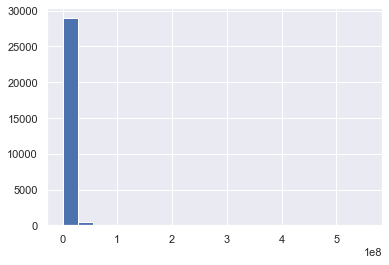

In [24]:
fuel_data['fuel_qty_burned'].hist(bins =20)

#### Q 6 - Which feature has missing values and what is the total number of missing value and percentage of the missing rows as a factor of the total number of rows in three decimal places? 

### (Enter answer in the format: Feature: FUEL_UNIT, Total: 180, Percent: 0.610)

In [25]:
# Check for null in the dataset, that is missing values in the dataset
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [27]:
# write a function to calculate the percentage of missing data
def missing_data(fuel_data):
    Total = fuel_data.isnull().sum().sort_values(ascending = False) 
    Percentage = (fuel_data.isnull().sum()/fuel_data.isnull().count()*100).sort_values(ascending = False)
    missing_data = pd.concat([Total, Percentage], axis = 1, keys = ['Total', 'Percentage'])
    return missing_data

In [28]:
missing_data(fuel_data)

,Total,Percentage
fuel_unit,180,0.609694
fuel_cost_per_mmbtu,0,0.000000
fuel_cost_per_unit_delivered,0,0.000000
fuel_cost_per_unit_burned,0,0.000000
fuel_mmbtu_per_unit,0,0.000000
fuel_qty_burned,0,0.000000
fuel_type_code_pudl,0,0.000000
plant_name_ferc1,0,0.000000
report_year,0,0.000000
utility_id_ferc1,0,0.000000


### Q 7 - The feature with missing values falls under what category? What missing value imputation technique would you use?

### The Answer - Categorical - Mode

In [30]:
# A view of the different data types
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [31]:
# fill the missing value in the fuel_unit column with mcf
fuel_data[['fuel_unit']] = fuel_data[['fuel_unit']].fillna(value=('mcf'))

# Check if the missing value has being filled in the column
fuel_data[['fuel_unit']].isnull().sum()

fuel_unit    0
dtype: int64

### Question 8 - Which of the features has the second and third lowest correlation with the Fuel Cost Per Unit Burned?
### The Answer - fuel_mmbtu_per_unit  and  fuel_qty_burned

plt.figure(figsize=(12,9))
sns.heatmap(fuel_data.corr(), annot = True, fmt='0.2g', vmin=-1, vmax=1, center=0, cmap= 'coolwarm', linewidths=1, linecolor='black')

In [33]:
correlation = fuel_data.corr()
correlation['fuel_cost_per_unit_burned'].sort_values(ascending= False)

fuel_cost_per_unit_burned       1.000000
report_year                     0.013599
fuel_cost_per_unit_delivered    0.011007
fuel_cost_per_mmbtu            -0.000437
fuel_mmbtu_per_unit            -0.010034
fuel_qty_burned                -0.018535
utility_id_ferc1               -0.037863
Name: fuel_cost_per_unit_burned, dtype: float64

### Question 9 - For the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994?

### Q 10 - Which year has the highest average fuel cost per unit delivered?
### The Answer - 

In [36]:
# the average cost of fuel_cost_per_unit_delivered by year
year_cat = fuel_data.groupby('report_year')
round(year_cat[['fuel_cost_per_unit_delivered']].mean(), 2).sort_values("fuel_cost_per_unit_delivered", ascending=False)

,fuel_cost_per_unit_delivered
report_year,
1997,11140.20
1996,9196.71
2000,985.36
2009,652.69
2018,499.27
2015,326.54
1998,287.15
2014,192.74
2013,172.31
